- 데이터셋 : auto-mpg.csv
- 목적 : 연비 예측
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : LinearRegression

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

[1] 데이터 불러오기

In [214]:
mpg = pd.read_csv('auto_mpg.csv')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [215]:
mpg['mpg(km/h)'] = mpg['mpg'] * 0.621371
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg(km/h)
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,11.184678
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,9.320565
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,11.184678
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,9.941936
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,10.563307
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,16.777017
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,27.340324
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,19.883872
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,17.398388


In [216]:
feature = mpg.iloc[:, [1, 2, 3, 4, 5, 6]]
target = mpg['mpg(km/h)']

[2] 데이터 전처리

[2-1] 결측치 확인

In [217]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 18.8+ KB


In [218]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: mpg(km/h)
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


> horsepower가 object로 되어 있어 결측치가 의심스러움

In [219]:
feature['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

> 확인 결과 '?'가 존재 (결측치이므로 제거)

In [220]:
na_index = feature[feature['horsepower'] == '?'].index
na_index

Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [221]:
new_feature = feature.drop(na_index)
new_target = target.drop(na_index)

In [222]:
new_feature['horsepower'] = [int(i) for i in new_feature['horsepower']]

In [223]:
new_feature.reset_index(drop = True, inplace = True)
new_target.reset_index(drop = True, inplace = True)

[2-2] 이상치 확인

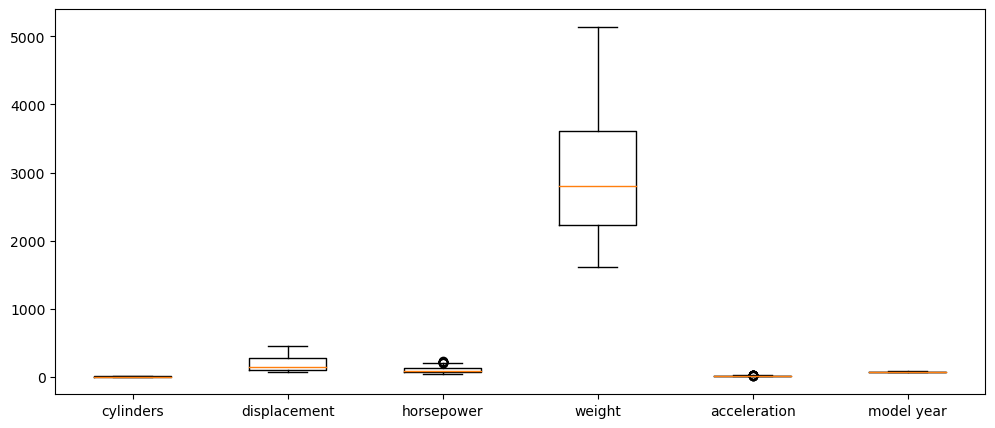

In [224]:
plt.figure(figsize = (12, 5))
plt.boxplot(new_feature)
plt.xticks(range(1, len(new_feature.columns) + 1), new_feature.columns)
plt.show()

> horsepower랑 acceleration에 이상치 존재하는 것으로 파악

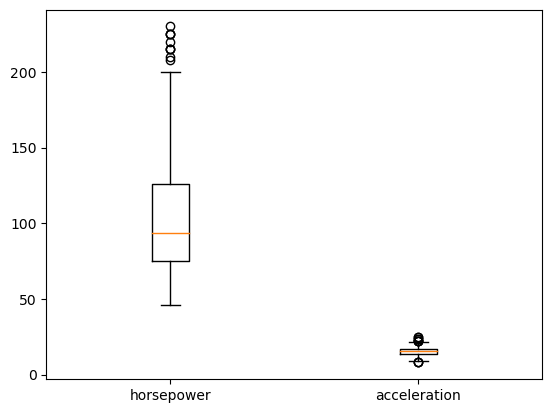

In [225]:
plt.boxplot(new_feature[['horsepower', 'acceleration']])
plt.xticks([1, 2], ['horsepower', 'acceleration'])
plt.show()

> 비상식적인 값은 아닌 것으로 파악되어 결측치 제거하지 않기로 결정

[3] 피쳐 선택

In [226]:
pd.concat([new_feature, new_target], axis = 1).corr()

,cylinders,displacement,horsepower,weight,acceleration,model year,mpg(km/h)
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
mpg(km/h),-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


> 모든 변수가 mpg와의 상관관계가 어느 정도 존재한다. 따라서 모든 변수를 피쳐로 고려

In [227]:
new_feature.corr()

,cylinders,displacement,horsepower,weight,acceleration,model year
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


> 하지만 cylinders, displacement, horsepower, weight 간의 강한 양의 상관관계가 존재하여 다중공선성이 발생할 위험이 크기 때문에 네 변수 중 horsepower 하나만 사용하기로 결정

In [228]:
final_feature = new_feature[['weight', 'model year']]
final_feature

,weight,model year
0,3504,70
1,3693,70
2,3436,70
3,3433,70
4,3449,70
...,...,...
387,2790,82
388,2130,82
389,2295,82
390,2625,82


In [229]:
print(f"feature : {final_feature.shape}, {final_feature.ndim}D")
print(f"target : {new_target.shape}, {new_target.ndim}D")

feature : (392, 2), 2D
target : (392,), 1D


> 최종적으로 horsepower, acceleration, model year를 피쳐로 선택

[4] 훈련/테스트 세트 분리

In [230]:
X_train, X_test, y_train, y_test = train_test_split(final_feature, new_target,
                                                    train_size=0.8, random_state=42)

In [231]:
print(f"X_train : {X_train.shape}, {X_train.ndim}D")
print(f"y_train : {y_train.shape}, {y_train.ndim}D")

print(f"X_test : {X_test.shape}, {X_test.ndim}D")
print(f"y_train : {y_test.shape}, {y_test.ndim}D")

X_train : (313, 2), 2D
y_train : (313,), 1D
X_test : (79, 2), 2D
y_train : (79,), 1D


[5] 스케일링

In [232]:
mm = MinMaxScaler()

mm.fit(X_train)

MinMaxScaler()

In [233]:
X_train_scaled = mm.transform(X_train)
X_test_scaled = mm.transform(X_test)

[5] 모델 생성 및 학습

In [234]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

model2 = LinearRegression()

model2.fit(X_train, y_train)

LinearRegression()

In [235]:
# 스케일링 한거
print(f"coef_ : {model.coef_}")
print(f"intercept_ : {model.intercept_}")

coef_ : [-14.90904653   5.78700788]
intercept_ : 17.474666959186067


> 회귀식 : mpg(km/h) = -19.22*horsepower + -6.92*acceleration + 4.96*model year + 21.32

In [236]:
# 스케일링 안한거
print(f"coef_ : {model2.coef_}")
print(f"intercept_ : {model2.intercept_}")

coef_ : [-0.00422712  0.48225066]
intercept_ : -9.464537039227979


> 회귀식 : mpg(km/h) = -0.1045*horsepower + -0.4121*acceleration + 0.4137*model year + 0.4715

[6] 성능 평가

In [239]:
y_pred = model.predict(X_train_scaled)

In [241]:
new_target

0      11.184678
1       9.320565
2      11.184678
3       9.941936
4      10.563307
         ...    
387    16.777017
388    27.340324
389    19.883872
390    17.398388
391    19.262501
Name: mpg(km/h), Length: 392, dtype: float64

In [242]:
model.score(X_train_scaled, y_train)

0.8100257649528945

In [243]:
model.score(X_test_scaled, y_test)

0.794177626123479

> 결정계수(R2) : 0.793